Learning Curves

In [3]:
import numpy as np
def make_data(N, err=1.0, rseed=1):
 # randomly sample the data
 rng = np.random.RandomState(rseed)
 X = rng.rand(N, 1) ** 2
 y = 10 - 1. / (X.ravel() + 0.1)
 if err > 0:
  y += err * rng.randn(N)
 return X, y
X, y = make_data(40)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting

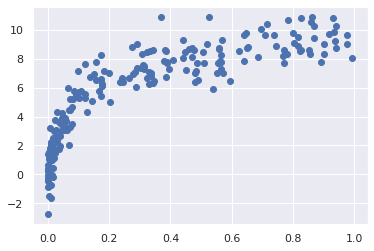

In [6]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


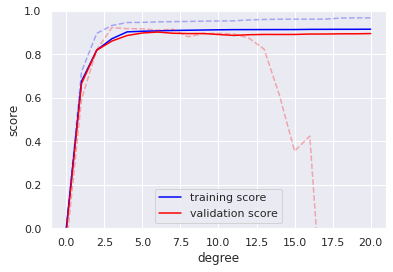

In [13]:
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
#
def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree),
  LinearRegression(**kwargs))
#
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
'polynomialfeatures__degree', degree, cv=7)

degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
  'polynomialfeatures__degree',
  degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',
  label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
  linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
  linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');


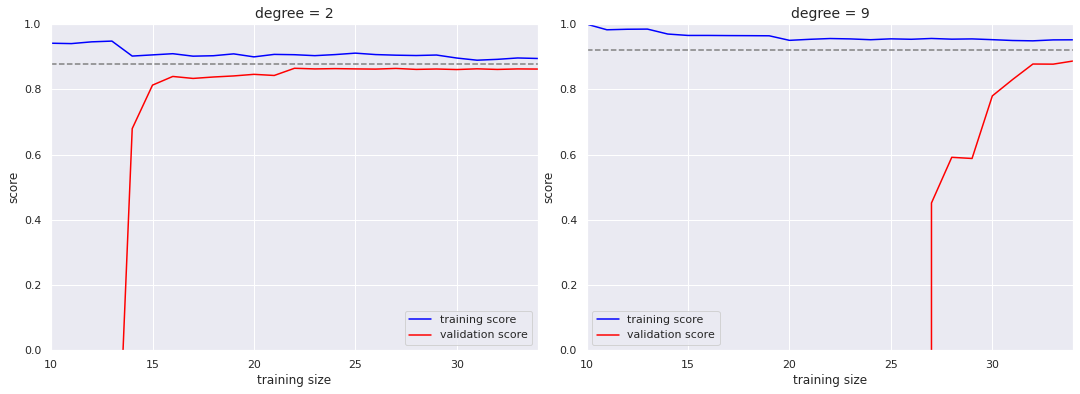

In [15]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
  N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
    X, y, cv=7,
  train_sizes=np.linspace(0.3, 1, 25))
  ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
  ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
  ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
    linestyle='dashed')
  ax[i].set_ylim(0, 1)
  ax[i].set_xlim(N[0], N[-1])
  ax[i].set_xlabel('training size')
  ax[i].set_ylabel('score')
  ax[i].set_title('degree = {0}'.format(degree), size=14)
  ax[i].legend(loc='best')